#  Used Car Price Prediction with Regularized Linear Models

##  Problem Statement

The goal of this project is to predict the **selling price** of used cars based on various features like brand, age, fuel type, seller type, and mileage. The dataset contains real-world listings scraped from an online marketplace.

We explore linear regression, Ridge, and Lasso models — including preprocessing, outlier handling, and feature engineering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

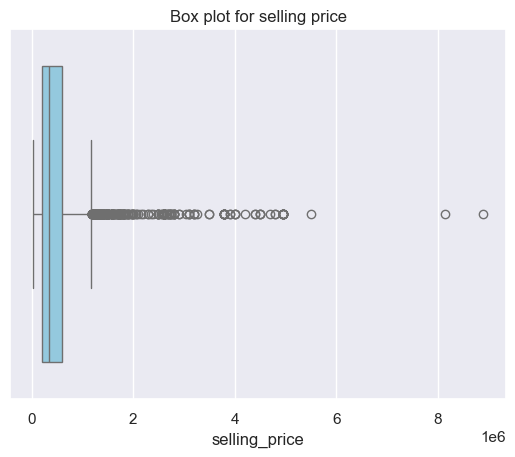

In [24]:
sns.set()
sns.boxplot(data=df, x='selling_price', orient="h", color="skyblue")
plt.title("Box plot for selling price")
plt.show()

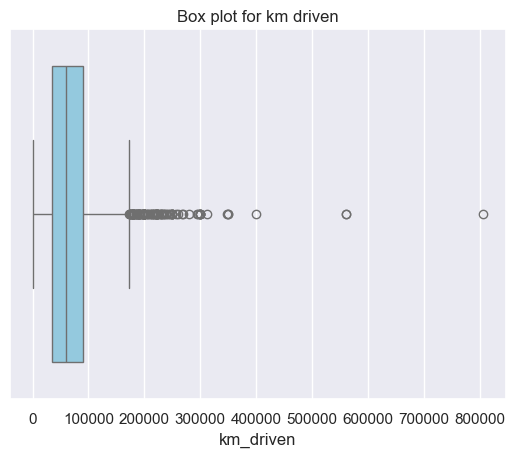

In [25]:
sns.set()
sns.boxplot(data=df, x='km_driven', orient="h", color="skyblue")
plt.title("Box plot for km driven")
plt.show()

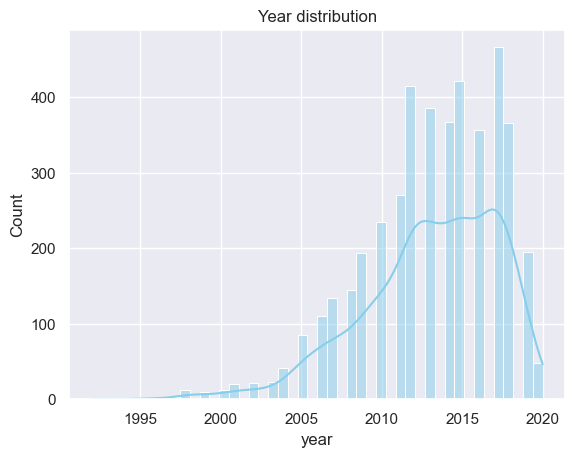

In [6]:
sns.set()
sns.histplot(data=df, x="year", kde=True, color="skyblue")
plt.title("Year distribution")
plt.show()

## Feature engineering 

In [29]:
df['car_age'] = 2025 - df["year"]
df["brand"] = df["name"].str.split().str[0]
df = df.drop(["name", "year"], axis=1)

In [30]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,brand
0,60000,70000,Petrol,Individual,Manual,First Owner,18,Maruti
1,135000,50000,Petrol,Individual,Manual,First Owner,18,Maruti
2,600000,100000,Diesel,Individual,Manual,First Owner,13,Hyundai
3,250000,46000,Petrol,Individual,Manual,First Owner,8,Datsun
4,450000,141000,Diesel,Individual,Manual,Second Owner,11,Honda


## Encoding categorical variables

In [31]:
for i in ["fuel", "seller_type", "transmission", "owner", 'brand']:
    print(df[i].value_counts())
    print()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

brand
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG 

In [32]:
brand_counts = df["brand"].value_counts()
rare_brands = brand_counts[brand_counts < 20].index

df["brand"] = df["brand"].replace(rare_brands, "Other")

In [33]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,brand
0,60000,70000,Petrol,Individual,Manual,First Owner,18,Maruti
1,135000,50000,Petrol,Individual,Manual,First Owner,18,Maruti
2,600000,100000,Diesel,Individual,Manual,First Owner,13,Hyundai
3,250000,46000,Petrol,Individual,Manual,First Owner,8,Datsun
4,450000,141000,Diesel,Individual,Manual,Second Owner,11,Honda


In [34]:
df["brand"].value_counts()

brand
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Datsun             37
Fiat               37
Other              36
Mercedes-Benz      35
Name: count, dtype: int64

### outlier treatment in numerical features

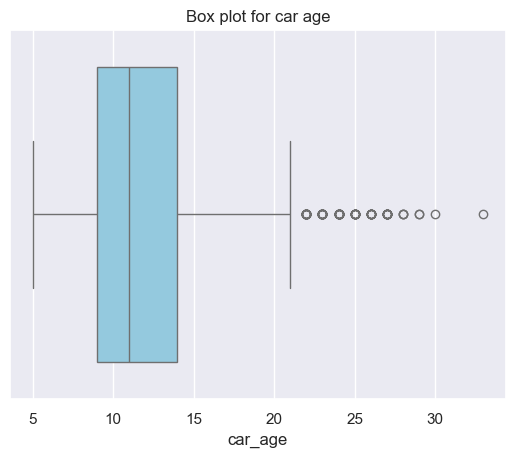

In [35]:
sns.set()
sns.boxplot(data=df, x='car_age', orient="h", color="skyblue")
plt.title("Box plot for car age")
plt.show()

In [36]:
df = df[df["selling_price"] < df["selling_price"].quantile(0.99)]
df = df[df["km_driven"] < df["km_driven"].quantile(0.99)]

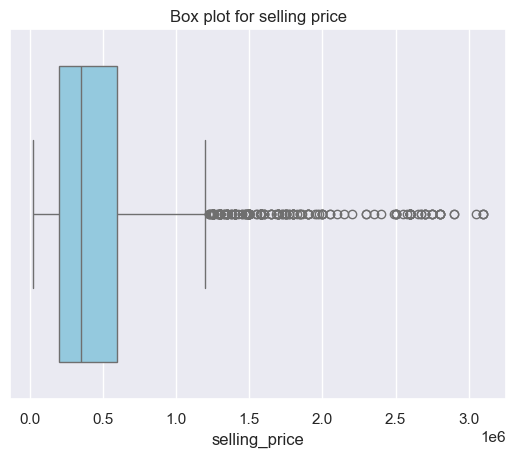

In [37]:
sns.set()
sns.boxplot(data=df, x='selling_price', orient="h", color="skyblue")
plt.title("Box plot for selling price")
plt.show()

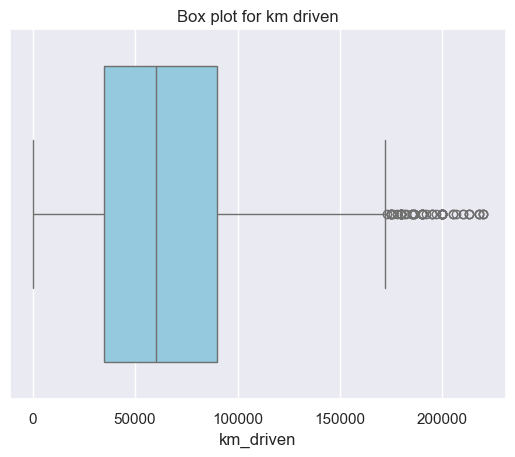

In [39]:
sns.set()
sns.boxplot(data=df, x='km_driven', orient="h", color="skyblue")
plt.title("Box plot for km driven")
plt.show()

In [43]:
df = df[
    (df["selling_price"] < df["selling_price"].quantile(0.98)) &
    (df["km_driven"] < df["km_driven"].quantile(0.99))
]


In [44]:
df["selling_price_log"] = np.log1p(df["selling_price"])

After applying log transformation, the distribution of selling_price_log approximated a normal curve,  
which stabilized the regression training.

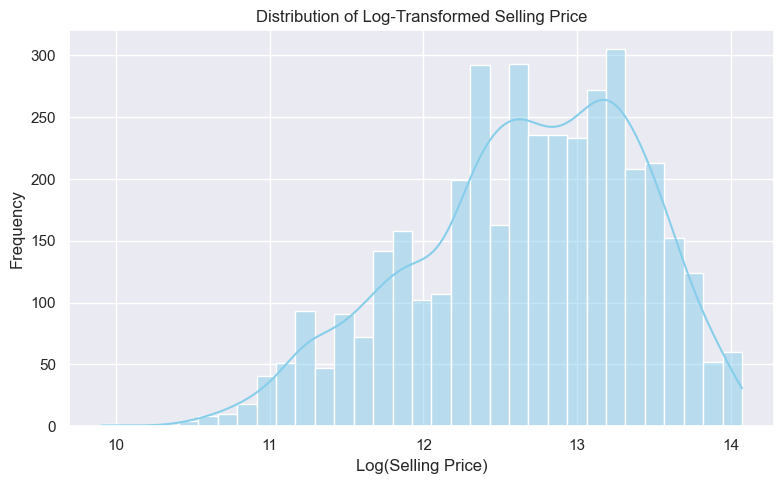

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df["selling_price_log"], kde=True, color="skyblue")
plt.title("Distribution of Log-Transformed Selling Price")
plt.xlabel("Log(Selling Price)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,brand,selling_price_log
0,60000,70000,Petrol,Individual,Manual,First Owner,18,Maruti,11.002117
1,135000,50000,Petrol,Individual,Manual,First Owner,18,Maruti,11.813037
2,600000,100000,Diesel,Individual,Manual,First Owner,13,Hyundai,13.304687
3,250000,46000,Petrol,Individual,Manual,First Owner,8,Datsun,12.429220
4,450000,141000,Diesel,Individual,Manual,Second Owner,11,Honda,13.017005


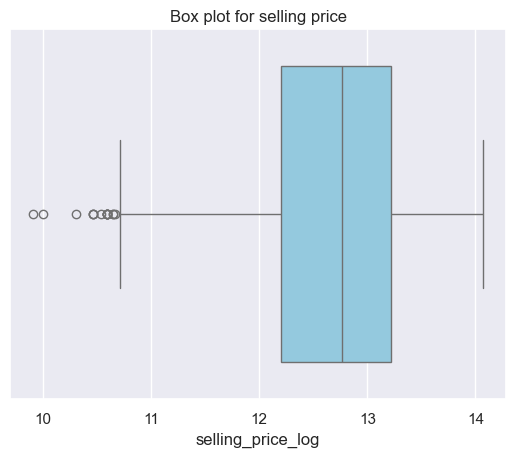

In [46]:
sns.set()
sns.boxplot(data=df, x='selling_price_log', orient="h", color="skyblue")
plt.title("Box plot for selling price")
plt.show()

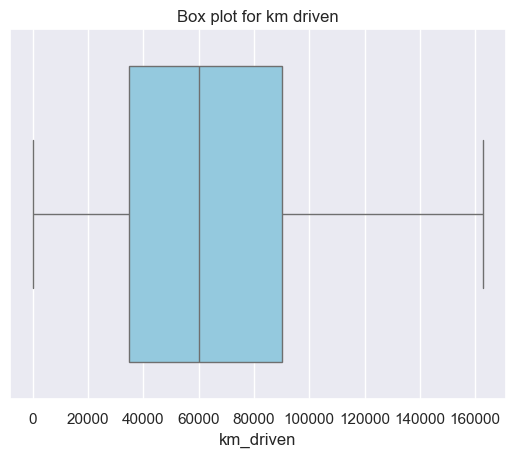

In [47]:
sns.set()
sns.boxplot(data=df, x='km_driven', orient="h", color="skyblue")
plt.title("Box plot for km driven")
plt.show()

now, when everything ok, let's do encoding of categorical variables and imlement linear regression

In [48]:
# separate for features and target
X = df.drop(["selling_price", "selling_price_log"], axis=1)
y = df["selling_price_log"]

In [52]:
X.head()

,km_driven,fuel,seller_type,transmission,owner,car_age,brand
0,70000,Petrol,Individual,Manual,First Owner,18,Maruti
1,50000,Petrol,Individual,Manual,First Owner,18,Maruti
2,100000,Diesel,Individual,Manual,First Owner,13,Hyundai
3,46000,Petrol,Individual,Manual,First Owner,8,Datsun
4,141000,Diesel,Individual,Manual,Second Owner,11,Honda


In [54]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [55]:
ohe_cols = ["fuel", "seller_type", "transmission", "brand"]
ordinal_col = ["owner"]

In [56]:
ordinal_encoder = OrdinalEncoder(categories=[["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner", "Test Drive Car"]])

In [70]:
ct = ColumnTransformer(transformers=[("onehot", OneHotEncoder(drop="first", sparse_output=False), ohe_cols), ("ordinal", ordinal_encoder, ordinal_col)], 
                      remainder="passthrough")

# Predicting prices with linear regression

In [79]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [71]:
X_encoded = ct.fit_transform(X)
X_encoded

array([[0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 7.0e+04, 1.8e+01],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 5.0e+04, 1.8e+01],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 1.0e+05, 1.3e+01],
       ...,
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 1.0e+00, 8.3e+04, 1.6e+01],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 9.0e+04, 9.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 0.0e+00, 4.0e+04, 9.0e+00]])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [75]:
y_pred_log = lr.predict(X_test_scaled)
y_pred_original = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

In [77]:
rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Linear Regression → RMSE: {rmse:.2f}, R²: {r2:.4f}")


Linear Regression → RMSE: 156377.20, R²: 0.6286


C:\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [80]:
alpha_values = {'alpha': [0.01, 0.1, 1, 10, 100, 500, 1000]}

In [81]:
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, alpha_values, cv=5, scoring='neg_root_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

print("Best Ridge alpha:", ridge_cv.best_params_['alpha'])

# Predict and evaluate
y_pred_log_ridge = ridge_cv.predict(X_test_scaled)
y_pred_ridge = np.expm1(y_pred_log_ridge)
rmse_ridge = mean_squared_error(y_test_original, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test_original, y_pred_ridge)

print(f"Ridge → RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.4f}")


Best Ridge alpha: 0.01
Ridge → RMSE: 156358.83, R²: 0.6287


C:\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [82]:
lasso = Lasso(max_iter=10000)  # Lasso converges slower
lasso_cv = GridSearchCV(lasso, alpha_values, cv=5, scoring='neg_root_mean_squared_error')
lasso_cv.fit(X_train_scaled, y_train)

print("Best Lasso alpha:", lasso_cv.best_params_['alpha'])

# Predict and evaluate
y_pred_log_lasso = lasso_cv.predict(X_test_scaled)
y_pred_lasso = np.expm1(y_pred_log_lasso)
rmse_lasso = mean_squared_error(y_test_original, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test_original, y_pred_lasso)

print(f"Lasso → RMSE: {rmse_lasso:.2f}, R²: {r2_lasso:.4f}")


Best Lasso alpha: 0.01
Lasso → RMSE: 157983.41, R²: 0.6210


C:\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


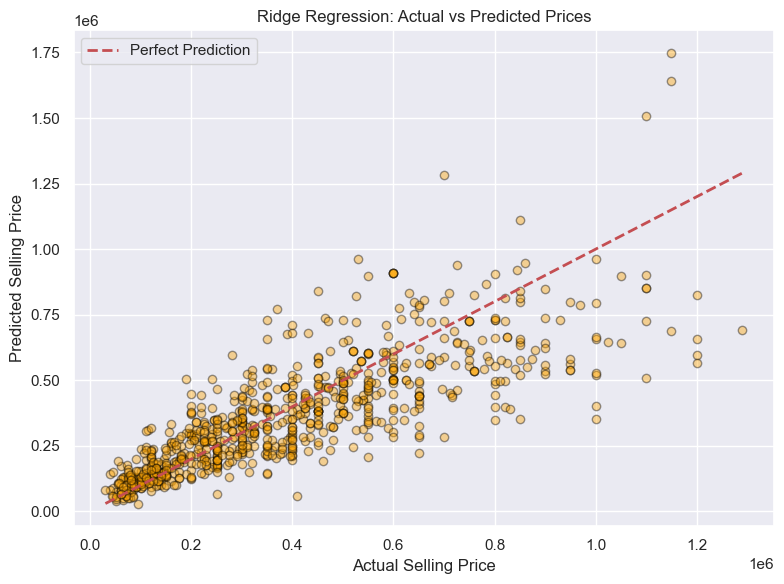

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_ridge, alpha=0.4, color="orange", edgecolor="black")
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Ridge Regression: Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plot of actual vs predicted prices shows a reasonably tight clustering along the diagonal, confirming that the Ridge model captures much of the price variance, though with some under- and overestimation at the extremes.”

##  Final Thoughts

- Ridge regression gave the best performance (R² ≈ 0.63, RMSE ≈ ₹156K)
- Log-transforming the target improved stability
- Outlier removal helped reduce RMSE